# Dimensionality Reduction


Dimensionality:      
number of columns we have in the dataset, assuming that we are working on a tidy dataset.      

When we have many columns in our dataset, (say more than 10), the data is considered high dimensional. If we are new to that dataset, it could be hard to find the most important patterns because of the complexity that comes with high-dimensionality. To overcome this, we can reduce the number of columns using dimensionality reduction techniques.     

These techniques can also be useful for relatively low dimensional datasets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

If a column has very little variance, then perhaps we can drop the column. To get a quick overview of which columns contain little variance, we can use .describe(). By default, this method only act on numerical data, but we can use arg exclude="number" to get summary statistics adapted to non-numerical data.

In [2]:
df_pokemon = pd.read_csv("../Machine_Learning_basics/data/pokemon.csv",index_col = [0])
df_pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type 1', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = df_pokemon[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1  Legendary
#                                                              
1  45      49       49              Bulbasaur  Grass      False
2  60      62       63                Ivysaur  Grass      False
3  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


In [12]:
df_selected.describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


In [13]:
df_selected.describe(exclude="number")

,Name,Type 1,Legendary
count,800,800,800
unique,800,18,2
top,Archen,Water,False
freq,1,112,735


## 1. Feature selection vs Feature extraction

Reducing the number of dimensions in our dataset has multiple benefits. The dataset will become simpler and thus easier to work with, require less disk space and faster computation. In addition, models are less likely to overfit on dataset with fewer dimension. The simplest way to reduce dimensionality is to only select th efeatures or columns that are important to us from a larger dataset.     

The hard part is to know which feature is important. If we are new to the dataset, we have to some EDA. e.g. pair plot from Seaborn can show if any data are perfectly correlated to each other, and if has, since they hold the same information, we can drop one of them. If there would have been a numeric feature without any variance in the dataset, we can drop them too.     

Feature selection:         
Drop the entire column (feature) and keep only the relevant ones.     

Feature extraction:     
Same goal of reducing dimensionality, but different approach. We will calculating or extracting new features from the original one. These new features have as little redundant information in them as possible and therefore fewer in number.     

One downside is that the newly created features are often less intuitive to understand than the original ones.

## 2. t-SNE visualisation of high-dimensional data

t-Distributed Stochastic Neighbor Embedding (t-SNE)       

t-SNE will maximise the distance in the 2 dimension.   

Before applying t-SNE, drop all non-numerical column as it does not work with non-numerical column.     

Using t-SNE from scikit-learn. High learning rate will cause the algorithm to be more adventurous in the configuration. Usually learning rate fall in the 10 to 1000 range.     

After we fit_transform, we can plot the data with hue=feature, to see if the dataset can be separated by the feature.

In [3]:
df_ansur_female = pd.read_csv("../Machine_Learning_basics/data/ANSUR_II_FEMALE.csv")
print(df_ansur_female.head())
print(df_ansur_female.shape)

                   Branch     Component  Gender  \
0          Combat Support  Regular Army  Female   
1  Combat Service Support  Regular Army  Female   
2  Combat Service Support  Regular Army  Female   
3  Combat Service Support  Regular Army  Female   
4             Combat Arms  Regular Army  Female   

   abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             231            1282                    301   
1                             194            1379                    320   
2                             183            1369                    329   
3                             261            1356                    306   
4                             309            1303                    308   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 204          1180                      222   
1                 207          1292                      225   
2                 233          1271         

In [4]:
#remove all non-numeirc col
non_numeric = ["BMI_class","Height_class","Gender","Component","Branch"]
df_ansur_female_numeric = df_ansur_female.drop(non_numeric,axis=1)
df_ansur_female_numeric.shape

(1986, 94)

In [19]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)
# fit and transform the TSNE model to our numierical dataset
# this project our high-dimension dataset onto a numpy array with 2 dimension
tsne_features = m.fit_transform(df_ansur_female_numeric)
#
tsne_features[1:4,:]


array([[-40.560696 ,  -0.6114784],
       [-29.482864 , -16.947702 ],
       [  1.360124 , -28.035597 ]], dtype=float32)

In [21]:
# assign back to original dataset
df_ansur_female["x"] = tsne_features[:,0]
df_ansur_female["y"] = tsne_features[:,1]

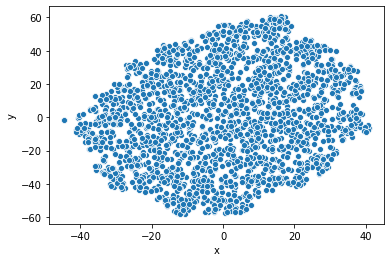

In [22]:
sns.scatterplot(x="x",y="y",data=df_ansur_female)
plt.show()
# one big cluster
# there are no distinct groups of female body shape with little in between
# there is a more continous distribution of body shapes, and thus one big cluster

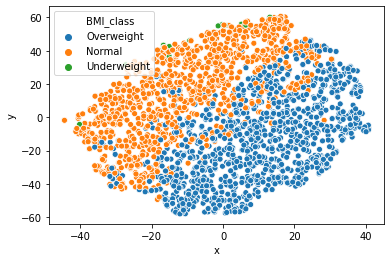

In [23]:
# using categorical data we excluded, we can reveal and hidden structure
sns.scatterplot(x="x",y="y",hue="BMI_class", data = df_ansur_female)
plt.show()
# from the 90+ features in the dataset, t-SNE picked up that weight explains alot of variance in the dataset
# and use that to spread out points alonf the xaxis.

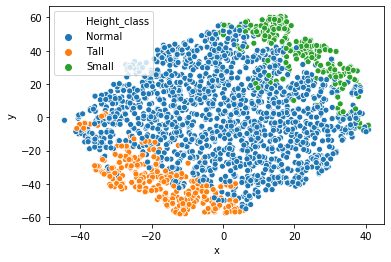

In [24]:
sns.scatterplot(x="x",y="y",hue="Height_class", data = df_ansur_female)
plt.show()

## 3. Dimensionality trade-off (Curse of Dimensionality)

We would rather have a dataset with alot of features compared to one with just a few.     
There is however 1 downside to high-dimensional datasets: models tend to overfit badly on high-dimensional data. The solution is to reduce dimensionality, but which feature to drop ?       

If we wish to add feature into dataset to increase accuracy, the number of observation should increase exponentially with the number of features to avoid overfitting.       



In [5]:
df_ansur_male = pd.read_csv("../Machine_Learning_basics/data/ANSUR_II_MALE.csv")
df_ansur_male.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [5]:
df_ansur_male.shape

(4082, 99)

In [6]:
non_numeric_withgender = ["BMI_class","Height_class","Component","Branch"]
df_ansur_male_numeric_gender = df_ansur_male.drop(non_numeric_withgender,axis=1)
df_ansur_male_numeric_gender.shape

(4082, 95)

In [7]:
df_ansur_female_numeric_gender = df_ansur_female.drop(non_numeric_withgender,axis=1)
df_ansur_female_numeric_gender.shape

(1986, 95)

In [8]:
df_fm_numeric_gender = pd.concat([df_ansur_male_numeric_gender,df_ansur_female_numeric_gender], ignore_index=True)
df_fm_numeric_gender.shape

(6068, 95)

In [16]:
df_fm_numeric_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 95 columns):
Gender                            6068 non-null object
abdominalextensiondepthsitting    6068 non-null int64
acromialheight                    6068 non-null int64
acromionradialelength             6068 non-null int64
anklecircumference                6068 non-null int64
axillaheight                      6068 non-null int64
balloffootcircumference           6068 non-null int64
balloffootlength                  6068 non-null int64
biacromialbreadth                 6068 non-null int64
bicepscircumferenceflexed         6068 non-null int64
bicristalbreadth                  6068 non-null int64
bideltoidbreadth                  6068 non-null int64
bimalleolarbreadth                6068 non-null int64
bitragionchinarc                  6068 non-null int64
bitragionsubmandibulararc         6068 non-null int64
bizygomaticbreadth                6068 non-null int64
buttockcircumference        

In [17]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = df_fm_numeric_gender["Gender"]

# Remove the Gender column to create the training data
X = df_fm_numeric_gender.drop("Gender", axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 94 Features.


In [19]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))
# overfitting !

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


67.1% accuracy on test set vs. 100.0% on training set


In [20]:
# drastically reduce dimension by only use 1 col  hat has some good information to distinguish gender
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = df_fm_numeric_gender[["neckcircumferencebase"]]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))
#better

93.6% accuracy on test set vs. 93.2% on training set


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 4. Features with missing values or little variance

Low variance features are so similar between different observations that they may contain little information we can use in an analysis.    

To remove them, we can use scikit-learn's built-in feature selection tools called VarianceThreshold().     

Variance values are not always easy to intepret or compare between features. e.g. high value may have higher variance. We should therefore normalise the variance before using it for feature selection.     

Another reason we might want to drop a feature is that it contains alot of missing values. 

In [49]:
df_fm_numeric = df_fm_numeric_gender.drop("Gender",axis=1)

In [21]:
df_fm_numeric_gender.shape
# 94 numeric col + gender

(6068, 95)

In [23]:
df_fm_numeric.shape

(6068, 94)

In [51]:
from sklearn.feature_selection import VarianceThreshold

# set min variance = 1
sel = VarianceThreshold(threshold = 1)
sel.fit(df_fm_numeric)

# mask whether each feature is above threshold or not
mask = sel.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True]


In [52]:
# use this mask to reduce dimension in the data set
reduced_df_fm_numeric = df_fm_numeric.loc[:,mask] # select all col, then sub-select cols using the mask
print(reduced_df_fm_numeric.shape)

(6068, 93)


In [27]:
# normalise the variance, then feature selection
sel = VarianceThreshold(threshold = 0.005)

#divide each col by its mean value b4 the selector
#variance will be lower after normalise
sel.fit(df_fm_numeric/df_fm_numeric.mean())

mask = sel.get_support()
print(mask)

[ True False False  True False False False  True  True False  True  True
 False False False  True  True False False False  True False  True  True
  True False False  True  True  True  True  True  True False False False
 False  True  True False False  True  True False False False False False
  True  True  True False False  True  True False False False  True  True
 False  True  True False False  True  True  True False  True False False
 False False False False  True  True False False False False False  True
  True  True  True  True False  True False  True False  True]


In [28]:
reduced_more_df_fm_numeric = df_fm_numeric.loc[:,mask]
print(reduced_more_df_fm_numeric.shape)
# more than half gone !

(6068, 45)


In [30]:
# pokemon df
# NaN value drop
df_pokemon.isna()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,False,False,False,False,False,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False,False,False,False,False,False
720,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df_pokemon.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [32]:
# count missing values
# divided by total no. of row
# ratio of missing values 
df_pokemon.isna().sum()/len(df_pokemon)
# half of type 2 feature is empty !

Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [33]:
# create a mask for few than 30# = True
mask = df_pokemon.isna().sum()/len(df_pokemon)<0.3
print(mask)

Name           True
Type 1         True
Type 2        False
Total          True
HP             True
Attack         True
Defense        True
Sp. Atk        True
Sp. Def        True
Speed          True
Generation     True
Legendary      True
dtype: bool


In [34]:
reduced_df_pokemon = df_pokemon.loc[:,mask]
reduced_df_pokemon.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [10]:
# Boston Public Schools dataset
df_school = pd.read_csv("../Machine_Learning_basics/data/Public_Schools2.csv")
df_school.head()

,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,...,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,...,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,...,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,...,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,...,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,...,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [36]:
df_school.shape

(131, 21)

In [37]:
# missing values
df_school.isna().sum()/len(df_school)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

In [39]:
# drop high na ratio col
# Create a boolean mask on whether each feature less than 50% missing values.
mask = df_school.isna().sum() / len(df_school) < 0.5

# Create a reduced dataset by applying the mask
reduced_df_school = df_school.loc[:,mask]

print(df_school.shape)
print(reduced_df_school.shape)

(131, 21)
(131, 19)


## 5. Pairwise correlation

We trid to remove features based on their individual properties, such as low variance or missing values. A next step is to look at how features relate to one another to decide if they are worth keeping.     

If we want to visualise correlated features, we can use sns.pairplot. If we want to quantify the correlation between features, we can use correlation coefficient r. (-1 < r < 1)        

We can calculate correlation coefficient on df with .corr(). If we call it on the dataset, we get correlation matrix. This is a symmetric matrix wrt diagonal. We can visualise this correlation matrix with sns.heatmap.       



In [11]:
df_fm_numeric.corr()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
abdominalextensiondepthsitting,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,0.506497,...,0.859924,0.939899,0.958932,0.579296,0.162457,0.550544,0.389220,0.825714,0.316876,0.866356
acromialheight,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,0.409043,...,0.446707,0.413142,0.371948,0.604967,0.933248,0.734622,0.922687,0.684610,0.980269,0.227299
acromionradialelength,0.321755,0.872475,1.000000,0.424626,0.862074,0.605970,0.734323,0.672158,0.461094,0.351546,...,0.384245,0.364133,0.338024,0.481149,0.851464,0.646149,0.684979,0.603964,0.859657,0.206267
anklecircumference,0.524747,0.512417,0.424626,1.000000,0.469964,0.711720,0.569457,0.541868,0.643211,0.453308,...,0.589723,0.569306,0.517324,0.479788,0.420109,0.702178,0.514394,0.745950,0.517026,0.625492
axillaheight,0.290821,0.987452,0.862074,0.469964,1.000000,0.657168,0.790214,0.707868,0.465773,0.369885,...,0.372178,0.337927,0.301106,0.565922,0.948190,0.687252,0.905063,0.621812,0.975837,0.147598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,0.550544,0.734622,0.646149,0.702178,0.687252,0.826903,0.745770,0.803476,0.765347,0.350715,...,0.581908,0.579536,0.557457,0.614334,0.637957,1.000000,0.663991,0.801215,0.749818,0.544034
wristheight,0.389220,0.922687,0.684979,0.514394,0.905063,0.628475,0.689499,0.624097,0.505623,0.465766,...,0.484488,0.446004,0.396134,0.615569,0.817358,0.663991,1.000000,0.671151,0.892968,0.267193
weight_kg,0.825714,0.684610,0.603964,0.745950,0.621812,0.731982,0.653566,0.707292,0.875688,0.582281,...,0.859654,0.872724,0.832213,0.677454,0.532079,0.801215,0.671151,1.000000,0.660265,0.854700
stature_m,0.316876,0.980269,0.859657,0.517026,0.975837,0.709889,0.815345,0.772618,0.520296,0.375509,...,0.408182,0.368734,0.327334,0.611199,0.936726,0.749818,0.892968,0.660265,1.000000,0.183094


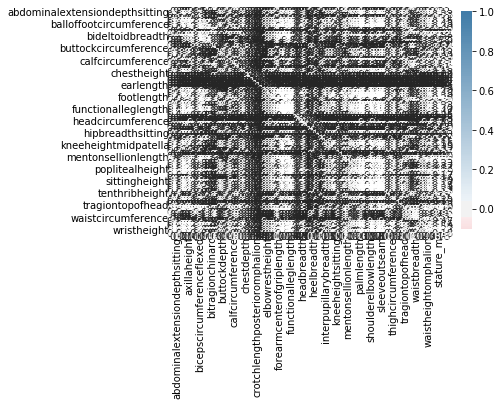

In [43]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
sns.heatmap(df_fm_numeric.corr(),center=0,cmap=cmap,linewidth=1,annot=True,fmt=".2f")

In [44]:
# remove the dianogal useless info
corr = df_fm_numeric.corr()
# create mask with 1 (True) , same dimesnsion as the correlation matrix
# triu = triangle upper function, set all non-upper triangle values to False
mask = np.triu(np.ones_like(corr,dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

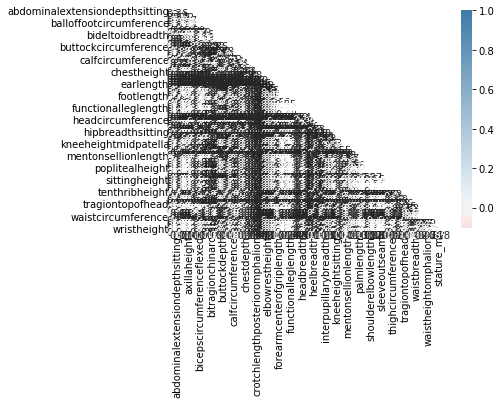

In [45]:
sns.heatmap(df_fm_numeric.corr(),mask=mask, center=0,cmap=cmap,linewidth=1,annot=True,fmt=".2f")

## 6. Removing highly correlated features

Apart from +1 and -1 correlations that we should drop, those close to +1 or -1 should also be dropped.     

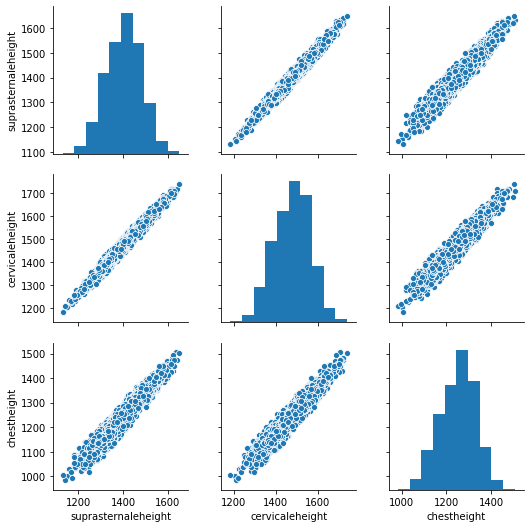

In [48]:
# these three feature are quite corelated
sns.pairplot(df_fm_numeric[["suprasternaleheight","cervicaleheight","chestheight"]])

In [50]:
df_fm_numeric[["suprasternaleheight","cervicaleheight","chestheight"]].corr()
# 98% correlation

,suprasternaleheight,cervicaleheight,chestheight
suprasternaleheight,1.000000,0.989308,0.968019
cervicaleheight,0.989308,1.000000,0.968008
chestheight,0.968019,0.968008,1.000000


In [51]:
# remove highly correlated features
# create +ve correlation matrix
corr_df = df_fm_numeric.corr().abs()

# create mask of the upper triangle of the dataset
mask=np.triu(np.ones_like(corr_df,dtype=bool))
# .mask(): replace all positions in the df where mask has a True with NA
tri_df = corr_df.mask(mask)

tri_df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
abdominalextensiondepthsitting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromialheight,0.360623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acromionradialelength,0.321755,0.872475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
anklecircumference,0.524747,0.512417,0.424626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axillaheight,0.290821,0.987452,0.862074,0.469964,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wristcircumference,0.550544,0.734622,0.646149,0.702178,0.687252,0.826903,0.745770,0.803476,0.765347,0.350715,...,0.581908,0.579536,0.557457,0.614334,0.637957,NaN,NaN,NaN,NaN,NaN
wristheight,0.389220,0.922687,0.684979,0.514394,0.905063,0.628475,0.689499,0.624097,0.505623,0.465766,...,0.484488,0.446004,0.396134,0.615569,0.817358,0.663991,NaN,NaN,NaN,NaN
weight_kg,0.825714,0.684610,0.603964,0.745950,0.621812,0.731982,0.653566,0.707292,0.875688,0.582281,...,0.859654,0.872724,0.832213,0.677454,0.532079,0.801215,0.671151,NaN,NaN,NaN
stature_m,0.316876,0.980269,0.859657,0.517026,0.975837,0.709889,0.815345,0.772618,0.520296,0.375509,...,0.408182,0.368734,0.327334,0.611199,0.936726,0.749818,0.892968,0.660265,NaN,NaN


In [52]:
# use list comprehension to find all cols that have a correlation to any feature straonger than the
# threshold values
# if we dun remove upper tri, then this will remove both of the high corrleated features !
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.95)]
print(to_drop)

['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength', 'buttockheight', 'cervicaleheight', 'chestheight', 'eyeheightsitting', 'forearmcenterofgriplength', 'handbreadth', 'iliocristaleheight', 'interscyei', 'kneeheightmidpatella', 'kneeheightsitting', 'neckcircumference', 'suprasternaleheight', 'waistbreadth', 'waistcircumference']


In [53]:
reduced_evenmore_df_fm_numeric = df_fm_numeric.drop(to_drop,axis=1)
reduced_evenmore_df_fm_numeric.shape

(6068, 75)

All these brutal force method should only be applied if we have a good understanding of the dataset. 

## 7. Selecting features for model performance

Another more pragmatic approach is to select features based on how they affect model performance.     
We can examine the feature coefficient to see which one are least used. If desired, we can keep removing features that does not contribute much to the model.     
Note that we should standardize the feature first, so that we can compare features.     

There is a scikit-learn function that can do this job:          
Recursive Feature Elimination (RFE) is a feature selection algorith that can be wrapped around any model that produces feature coefficients or feature importance values.     
While fitting to our data it will repeat a process where it first fits the internal model and then drops the feature with the weakest coefficient. It will keep doing this until the desired number of features is reached.      
Note that dropping one feature will affect other feature's coefficient, so this method is safer than dropping multiple feature at once.     



In [13]:
df_fm_sample1 = df_fm_numeric_gender[["Gender","chestdepth","handlength","neckcircumference","shoulderlength","earlength"]]

In [14]:
df_fm_sample1.head()

,Gender,chestdepth,handlength,neckcircumference,shoulderlength,earlength
0,Male,259,193,400,145,71
1,Male,253,195,380,141,62
2,Male,267,203,403,167,61
3,Male,262,194,407,148,66
4,Male,232,218,398,180,56


In [16]:
from sklearn.model_selection import train_test_split

X = df_fm_sample1[["chestdepth","handlength","neckcircumference","shoulderlength","earlength"]]
y = df_fm_sample1["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# standardise the training X_train
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_std,y_train)

#evaluate performance on test set
X_test_std = scaler.transform(X_test)

y_pred = lr.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

0.985172981878089


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
print(lr.coef_)
#some of the values are close to zero
# these will contribute little when making a prediction

[[-3.1610719   0.19058143  7.76542558  1.11206813  0.78030316]]


In [20]:
print(dict(zip(X.columns,abs(lr.coef_[0]))))

{'chestdepth': 3.1610718989857207, 'handlength': 0.1905814292113524, 'neckcircumference': 7.7654255773307925, 'shoulderlength': 1.1120681310549323, 'earlength': 0.7803031577868187}


In [21]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(),n_features_to_select=2,verbose=1)
rfe.fit(X_train_std,y_train)

Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=2, step=1, verbose=1)

In [22]:
X.columns[rfe.support_]

Index(['chestdepth', 'neckcircumference'], dtype='object')

In [23]:
print(dict(zip(X.columns,rfe.ranking_)))
# one means that feature is kept

{'chestdepth': 1, 'handlength': 4, 'neckcircumference': 1, 'shoulderlength': 2, 'earlength': 3}


In [24]:
X.columns

Index(['chestdepth', 'handlength', 'neckcircumference', 'shoulderlength',
       'earlength'],
      dtype='object')

In [25]:
accuracy_score(y_test, rfe.predict(X_test_std))

0.9807797913234486

In [26]:
# Pima Indians diabetes dataset
df_pima = pd.read_csv("../Machine_Learning_basics/data/PimaIndians.csv")
df_pima.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,family,age,test
0,1,89,66,23,94,28.1,0.167,21,negative
1,0,137,40,35,168,43.1,2.288,33,positive
2,3,78,50,32,88,31.0,0.248,26,positive
3,2,197,70,45,543,30.5,0.158,53,positive
4,1,189,60,23,846,30.1,0.398,59,positive


In [28]:
X = df_pima.drop("test",axis=1)
y = df_pima["test"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [30]:
# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)
lr = LogisticRegression()
# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

78.0% accuracy on test set.
{'pregnant': 0.36, 'glucose': 1.2, 'diastolic': 0.03, 'triceps': 0.22, 'insulin': 0.07, 'bmi': 0.46, 'family': 0.51, 'age': 0.31}


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fits the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 1, 'glucose': 1, 'diastolic': 3, 'triceps': 2, 'insulin': 6, 'bmi': 4, 'family': 1, 'age': 5}
Index(['pregnant', 'glucose', 'family'], dtype='object')
78.0% accuracy on test set.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

## 8. Tree-based feature selection

Some models will perform feature selection by design to avoid overfitting. One of those is the random forest classifier. It is an ensemble model that will pass different, random, subsets of features to a number of decision trees.     

To make a prediciton it will aggregate over the predictions of the individual trees. Random tree usually avoids overfitting even with default parameters in scikit learn. In the ANSUR dataset below, what the trained model could look like, the first decision tree in the forest used the "neckcircumference" on its first decison node and "handlength" later on to deterine if a person is male or female. The random forest tree can calculate feature importance value. (depend on the position of the node, near root or not).    



In [34]:
# Select the Gender column as the feature to be predicted (y)
y = df_fm_numeric_gender["Gender"]

# Remove the Gender column to create the training data
X = df_fm_numeric_gender.drop("Gender", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

print(accuracy_score(y_test, rf.predict(X_test)))

0.9890170236133993


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
#extract the feature importance attribute
print(rf.feature_importances_)

[1.63817191e-04 6.40457849e-04 3.52014162e-04 5.16863820e-04
 2.90423865e-04 1.40578752e-03 4.30184119e-04 2.22347856e-01
 4.35895525e-03 6.08702329e-03 4.86744186e-02 9.26238351e-02
 6.17426974e-04 1.99066222e-03 2.94139666e-03 2.15573701e-02
 1.56738688e-03 1.30400249e-03 2.98947368e-03 2.15767999e-03
 6.96732049e-04 3.99440076e-04 9.10012163e-04 8.52341632e-04
 4.52306905e-03 1.72104128e-02 7.56318543e-04 7.53623694e-03
 1.39049348e-04 5.61302488e-04 5.88072735e-04 2.14841765e-03
 1.24372482e-03 7.75251362e-04 1.12877048e-03 1.63571525e-03
 1.33462917e-03 4.85560372e-03 4.49491010e-03 8.35952929e-04
 7.66128464e-04 1.08806688e-02 1.20512146e-02 5.88924565e-04
 1.65638785e-03 6.17149139e-04 1.57279859e-03 8.40225737e-04
 5.04177650e-04 2.02128207e-02 2.35349164e-02 1.05524473e-03
 3.69104497e-04 5.09793401e-03 1.04464290e-02 3.80958897e-04
 1.01173408e-04 4.65895960e-04 6.52969332e-03 2.13517127e-03
 1.46261334e-03 9.59602281e-02 1.23586071e-01 1.49695125e-03
 5.78750740e-04 7.718428

In [36]:
sum(rf.feature_importances_) # no need to scale first, 

1.0000000000000002

In [38]:
# create a mask based on feature importance
mask = rf.feature_importances_ > 0.1
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [39]:
X_reduced = X.loc[:,mask]
X_reduced.columns

Index(['biacromialbreadth', 'neckcircumferencebase'], dtype='object')

In [43]:
# RFE with random forest

rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=6,step=10,verbose=1)

rfe.fit(X_train,y_train)

Fitting estimator with 94 features.
Fitting estimator with 84 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 44 features.
Fitting estimator with 34 features.
Fitting estimator with 24 features.
Fitting estimator with 14 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/XavierTang/anacon

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators='warn', n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=6, step=10, verbose=1)

In [44]:
accuracy_score(y_test, rfe.predict(X_test))

0.956068094453597

In [45]:
X.columns[rfe.support_]

Index(['chestheight', 'handcircumference', 'neckcircumference',
       'neckcircumferencebase', 'shouldercircumference', 'wristcircumference'],
      dtype='object')

## 9. Regularised Linear Regression



In [55]:
from sklearn.linear_model import Lasso
X = reduced_df_fm_numeric.drop("BMI",axis=1)
y = reduced_df_fm_numeric["BMI"]
# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 82.9% of the variance in the test set.
The model has ignored 82 out of 92 features.


## 10. Combining feature selectors

Manually finding an alpha for Lasso regressor can be tediois -> LassoCV      
Get optimal value of alpha with alpha_ attribute.      

We can have miltiple model each cast their vote on whether we should keep a feature or not. We can then combine the votes to make a decision. 

In [57]:
from sklearn.linear_model import LassoCV

lcv = LassoCV()

lcv.fit(X_train_std,y_train)

print(lcv.alpha_)

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.003547777297472907


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.338297859259228, tolerance: 6.73560021064483
  positive)


In [58]:
# to remove the features to which the Lasso regressor assigned a zero
# mask
mask = lcv.coef_ != 0
print(mask)

[ True  True  True  True  True False False  True  True  True  True False
  True  True  True  True  True False False False  True  True  True  True
  True False False  True  True  True  True False  True  True False False
  True  True False False  True False False  True  True False  True  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True False False  True  True  True  True False False  True  True
 False False  True  True  True  True False  True  True False False  True
  True  True  True  True False  True  True  True]


In [ ]:
reduced_X = X.loc[:,mask]

In [60]:
# combine feature selector
# model 1: lassocv
lcv = LassoCV()
lcv.fit(X_train_std,y_train)

print(lcv.score(X_test_std,y_test))
lcv_mask=lcv.coef_ != 0
print(sum(lcv_mask))

/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9920911651750082
64


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.338297859259228, tolerance: 6.73560021064483
  positive)


In [63]:
from sklearn.ensemble import RandomForestRegressor

rfe_rf = RFE(estimator=RandomForestRegressor(),n_features_to_select=64,step=5, verbose=1)
rfe_rf.fit(X_train_std,y_train)
rf_mask = rfe_rf.support_
rf_mask

Fitting estimator with 92 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 87 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 82 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 77 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 72 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting estimator with 67 features.


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/XavierTang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor(),n_features_to_select=66,step=5,verbose=1)
rfe_gb.fit(X_train_std,y_train)

gb_mask = rfe_gb.support_
gb_mask

Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.


array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [66]:
# combine !
votes = np.sum([lcv_mask,rf_mask,gb_mask],axis=0)
print(votes)

[3 2 2 3 3 1 1 2 3 3 3 0 3 2 3 3 3 1 0 1 3 3 3 3 3 1 2 3 2 1 1 0 3 3 1 0 1
 3 2 0 3 0 1 1 2 2 1 1 3 2 3 3 3 3 1 2 2 3 1 3 2 3 2 1 2 3 2 3 1 1 3 1 2 0
 3 3 3 3 2 3 3 2 0 3 3 3 3 3 2 3 3 3]


In [ ]:
# if we do not want to lose info, we can select all features with at least one vote
# here we chose at least 2 models voting for a feature in order to keep it
mask = votes >= 2
reduced_X_combine = X.loc[:,mask]

## 11. Feature Extraction

When we have a good understanding of the features in our dataset we can sometimes combine multiple features into a new feature that makes the original ones obsolete.     

e.g. BMI contains useful info about height and weight, so once we have BMI, the height and weight col might become obsolete in a diabeter dataset.

## 12. PCA

When combining two similar feature (e.g. left leg and right leg length) we can take the mean.     
Instead of taking mean, we can use something else - PCA.     

For PCA, it is important to scale first, so that their values are easy to compare.      



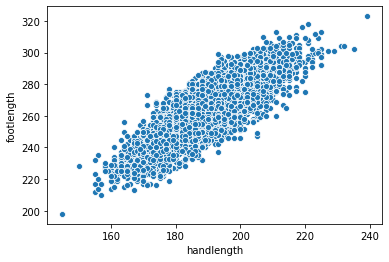

In [67]:
sns.scatterplot(data=df_fm_numeric_gender,x="handlength",y="footlength")
plt.show()

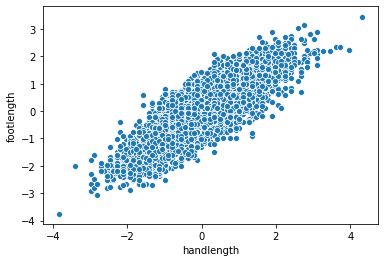

In [68]:
scaler = StandardScaler()
df_fm_numeric_std = pd.DataFrame(scaler.fit_transform(df_fm_numeric),columns = df_fm_numeric.columns)
sns.scatterplot(data=df_fm_numeric_std,x="handlength",y="footlength")
plt.show()

# we can put a reference point at the center (0,0)
# and point a vector in the direction of the strongest pattern, i,e, upper right corner
# ppl with +ve value for this vector has long hand and feet
# a second vector that is perpendicular to the first one, i,e, upper left corner
# +ve value: long feet compared to teir hand len
# -veL have relatively big hand
# every point in this data set can be described by multiplying and then summing these 2
# perpendicular vectors.
# a new reference system aligned with the variance of the data.

In [ ]:
# manual feature extraction, using grocery dataset
df_sales = pd.read_csv